In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Saulius/
!ls

# import os
# for dirname, _, filenames in os.walk('.'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Saulius
Animal_Dataset	Human_Face_Dataset  Rock_Dataset


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_animal_folder = "./Animal_Dataset/dataset/training_set"
training_rock_folder = "./Rock_Dataset/training_set"
training_human_folder = "./Human_Face_Dataset/training_set"
testing_animal_folder = "./Animal_Dataset/dataset/test_set"
testing_rock_folder = "./Rock_Dataset/test_set"
testing_human_folder = "./Human_Face_Dataset/test_set"

train = []
test = []

for folder in os.listdir(training_animal_folder):
    print(folder)
    folder_path = os.path.join(training_animal_folder, folder) 
    for img_i in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_i)
        train.append([img_path, 0])

for folder in os.listdir(training_rock_folder):
    print(folder)
    folder_path = os.path.join(training_rock_folder, folder) 
    for img_i in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_i)
        train.append([img_path, 0])
        
for folder in os.listdir(training_human_folder):
    print(folder)
    folder_path = os.path.join(training_human_folder,folder) 
    for img_i in os.listdir(folder_path):
        img_path = os.path.join(folder_path,img_i)
        train.append([img_path, 1])

for folder in os.listdir(testing_animal_folder):
    folder_path = os.path.join(testing_animal_folder, folder)
    for img_i in os.listdir(folder_path):
        img_path = os.path.join(folder_path,img_i)
        test.append([img_path,0])

for folder in os.listdir(testing_rock_folder):
    folder_path = os.path.join(testing_rock_folder, folder)
    for img_i in os.listdir(folder_path):
        img_path = os.path.join(folder_path,img_i)
        test.append([img_path,0])

for folder in os.listdir(testing_human_folder):
    folder_path = os.path.join(testing_human_folder, folder)
    for img_i in os.listdir(folder_path):
        img_path = os.path.join(folder_path,img_i)
        test.append([img_path,1])
        
    
train = pd.DataFrame(train,columns=['img_path','is_human'])
test = pd.DataFrame(test,columns=['img_path','is_human'])

test = test.sample(frac = 1)
test.head()
test.tail()

dogs
cats
Sedimentary
Metamorphic
Humans


,img_path,is_human
1742,./Animal_Dataset/dataset/test_set/dogs/dog.478...,0
1200,./Animal_Dataset/dataset/test_set/dogs/dog.462...,0
2166,./Rock_Dataset/test_set/Granite/69.png,0
798,./Animal_Dataset/dataset/test_set/cats/cat.452...,0
651,./Animal_Dataset/dataset/test_set/cats/cat.464...,0


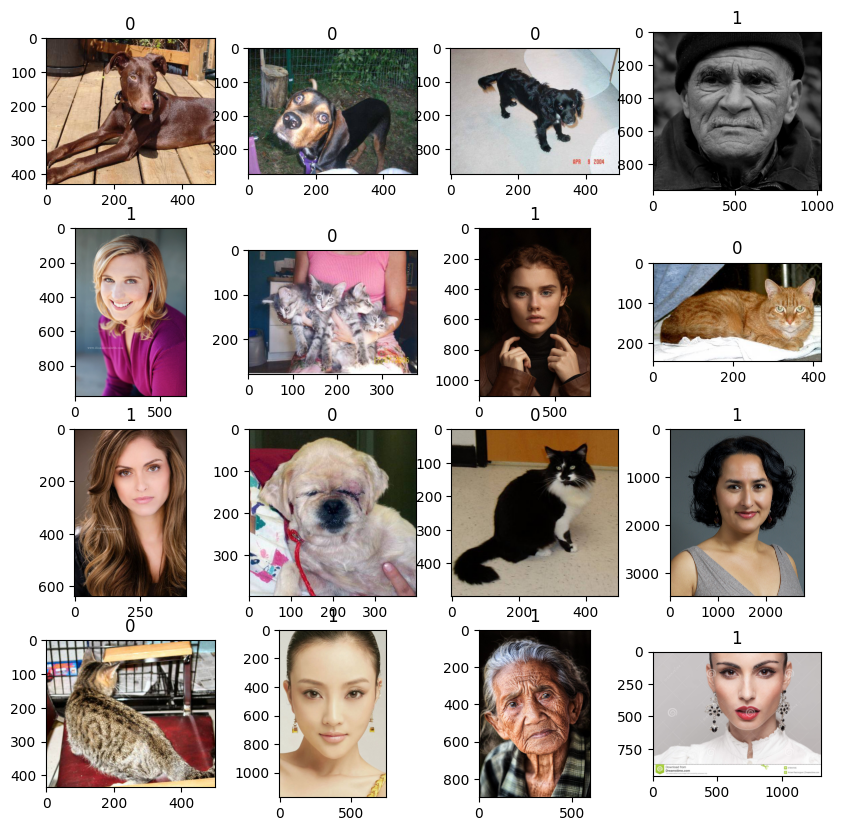

Found 10570 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 5 invalid image filename(s) in x_col="img_path". These filename(s) will be ignored.
  warnings.warn(


Found 4529 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 5 invalid image filename(s) in x_col="img_path". These filename(s) will be ignored.
  warnings.warn(


Found 2336 validated image filenames belonging to 2 classes.


In [ ]:
img = image.load_img(train.iloc[0,0])
fig = plt.figure(figsize=(10,10))
h,w = 4,4
r,c = h,w
ax=[]
for i in range(1,r*c +1):
    k = np.random.randint(train.shape[0])
    img = image.load_img(train.iloc[k,0])
    ax.append(fig.add_subplot(r,c,i))
    ax[-1].set_title(train.iloc[k,1])
    plt.imshow(img)

plt.show()

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  zoom_range = 0.2,
                                  shear_range = 0.2,
                                   rotation_range= 10,
                                   validation_split = 0.3
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)

train["is_human"] = train["is_human"].astype(str)
training_set = train_datagen.flow_from_dataframe(train,
                                                x_col = "img_path",
                                                 y_col = "is_human",
                                                target_size = (100,100),
                                                 batch_size =32,
                                                class_mode = 'categorical',
                                                 shuffle = True,
                                                 subset="training"
                                                )

train["is_human"] = train["is_human"].astype(str)
validation_set = train_datagen.flow_from_dataframe(train,
                                                x_col = "img_path",
                                                 y_col = "is_human",
                                                target_size = (100,100),
                                                 batch_size =32,
                                                class_mode = 'categorical',
                                                 shuffle = True,
                                                   subset="validation"
                                                )
test["is_human"] = test["is_human"].astype(str)
testing_set = test_datagen.flow_from_dataframe(test,
                                               x_col = "img_path",
                                               y_col = "is_human",
                                              target_size = (100,100),
                                              class_mode = 'categorical',
                                               shuffle = False,
                                               batch_size = 32
                                              )

In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Conv2D(32,(3,3),activation ='relu',padding='same',input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),activation ='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3),activation ='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3),activation ='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

model.layers


In [ ]:
model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics = ['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

In [ ]:
early_stopping = EarlyStopping(min_delta = 0.001,
                              patience = 7,
                              restore_best_weights= True)

predict = model.fit(training_set,
                   epochs = 20,
                   steps_per_epoch = 50,
                    #callbacks = [early_stopping],
                    validation_data = validation_set
                   )

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 [==============================] - 1295s 26s/step - loss: 0.6440 - accuracy: 0.6844 - val_loss: 1.0124 - val_accuracy: 0.0000e+00
Epoch 2/20
50/50 [==============================] - 163s 3s/step - loss: 0.5618 - accuracy: 0.6756 - val_loss: 0.6910 - val_accuracy: 0.8995
Epoch 3/20
50/50 [==============================] - 142s 3s/step - loss: 0.4348 - accuracy: 0.7931 - val_loss: 0.8557 - val_accuracy: 0.6386
Epoch 4/20
50/50 [==============================] - 146s 3s/step - loss: 0.2818 - accuracy: 0.8913 - val_loss: 0.9795 - val_accuracy: 0.5270
Epoch 5/20
50/50 [==============================] - 135s 3s/step - loss: 0.2550 - accuracy: 0.8994 - val_loss: 0.3675 - val_accuracy: 0.8302
Epoch 6/20
50/50 [==============================] - 118s 2s/step - loss: 0.2338 - accuracy: 0.9050 - val_loss: 0.5017 - val_accuracy: 0.7602
Epoch 7/20
50/50 [==============================] - 105s 2s/step - loss: 0.2069 - accuracy: 0.9162 - val_loss: 0.3091 - val_accuracy: 0.9238
Epoch 8/20
50/50 [

142/142 [==============================] - 31s 219ms/step - loss: 0.2802 - accuracy: 0.8598
85.97924709320068


<Axes: >

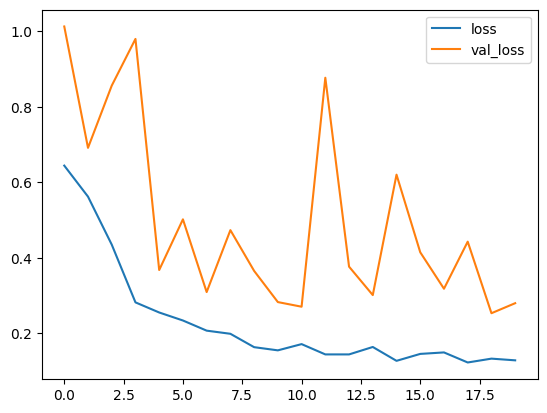

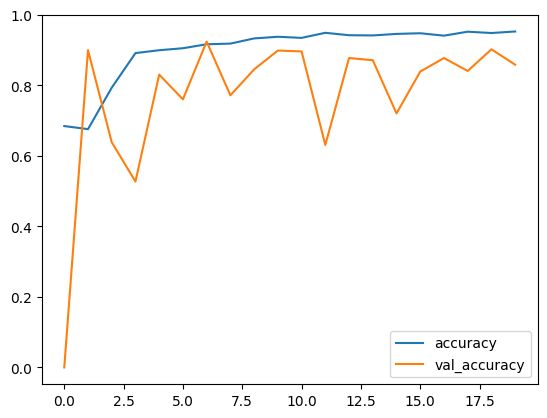

In [ ]:
accuracy = model.evaluate(validation_set)
print(accuracy[1]*100)

history_df = pd.DataFrame(predict.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()

In [ ]:
Y_pred = model.predict(testing_set)
y_pred =np.argmax(Y_pred,axis=1)
print(*y_pred)

73/73 [==============================] - 524s 7s/step
0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 

In [ ]:
model.save("saulius.h5")